# TenX Data1 PBMC after BC
## Xiaonan Wang
## 27Oct2017

In [1]:
%config InlineBackend.figure_formats = ['retina']  # increase resolution on retina screens
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pl
import scanpy.api as sc
from matplotlib.colors import LinearSegmentedColormap
import sys
sys.path.append('/servers/lila-single-cell/Xiaonan/python_modules/')
from TenX_sub import *

cmap = LinearSegmentedColormap.from_list(name='gene_cmap', colors=['lightgrey', 'thistle', 'red', 'darkred']) 

sc.settings.verbosity = 0                # increase for more output
sc.settings.set_dpi(80)                  # low pixel number yields small inline figures
sc.logging.print_version_and_date()

/home/USSR/xw251/anaconda2/envs/mypython3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Running Scanpy version 0.2.3 on 2018-05-11 13:51.


# Extract T cells from PBMC data

Now we extract T cells from PBMC data and perform louvain clustering. This information will be used as training data for the classification of TU cells.

In [ ]:
PBMC_data = sc.read('PBMC_data_BC_HVG')

In [116]:
PBMC_conditions = PBMC_data.smp['Classification_68K']
PBMC_conditions_unique = np.unique(PBMC_conditions)
print(PBMC_conditions_unique)
Tcells_PBMC_index = []
for x in PBMC_conditions:
    if x==PBMC_conditions_unique[3] or x==PBMC_conditions_unique[4] or x==PBMC_conditions_unique[5] or x==PBMC_conditions_unique[6] or x==PBMC_conditions_unique[7] or x==PBMC_conditions_unique[8]:
        Tcells_PBMC_index.append(True)
    else:
        Tcells_PBMC_index.append(False)
print(sum(Tcells_PBMC_index))
print(Tcells_PBMC_index[0:10])
old_louvain_groups = PBMC_data.smp['louvain_groups'][np.array(Tcells_PBMC_index)]
Tcells_PBMC_data = PBMC_data[np.array(Tcells_PBMC_index),]
print(Tcells_PBMC_data.X.shape)

['CD14+ Monocyte' 'CD19+ B' 'CD34+' 'CD4+/CD25 T Reg'
 'CD4+/CD45RA+/CD25- Naive T' 'CD4+/CD45RO+ Memory' 'CD56+ NK'
 'CD8+ Cytotoxic T' 'CD8+/CD45RA+ Naive Cytotoxic' 'Dendritic']
14199
[True, True, False, True, True, True, True, False, True, True]
(14199, 1607)


### Here used all HVGs from PBMC data.

In [105]:
%%time
sc.tl.tsne(Tcells_PBMC_data,n_jobs=40)
sc.logging.print_memory_usage()

Memory usage: current 3.85 GB, difference +3.85 GB
CPU times: user 42min, sys: 1min 33s, total: 43min 33s
Wall time: 1min 9s


In [14]:
print(np.unique(Tcells_PBMC_data.smp['Classification_68K']))

['CD4+/CD25 T Reg' 'CD4+/CD45RA+/CD25- Naive T' 'CD4+/CD45RO+ Memory'
 'CD56+ NK' 'CD8+ Cytotoxic T' 'CD8+/CD45RA+ Naive Cytotoxic']


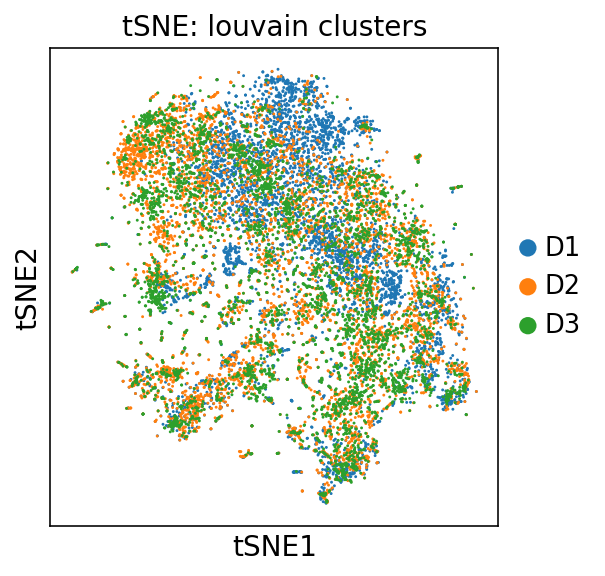

In [110]:
ax = sc.pl.tsne(Tcells_PBMC_data, color=['key_labels'], legend_loc='right margin', title='tSNE: louvain clusters')

### Louvain clustering

In [48]:
%%time
sc.tl.louvain(Tcells_PBMC_data, resolution=0.45, n_jobs=40)
sc.logging.print_memory_usage()

Memory usage: current 0.61 GB, difference +0.00 GB
CPU times: user 15.4 s, sys: 104 ms, total: 15.5 s
Wall time: 15.5 s


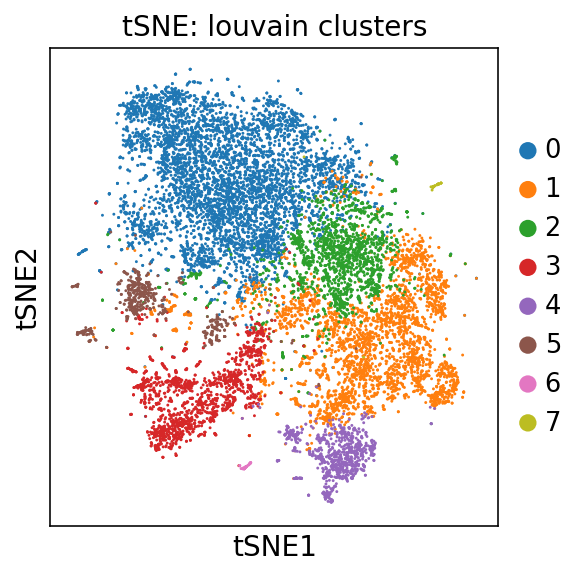

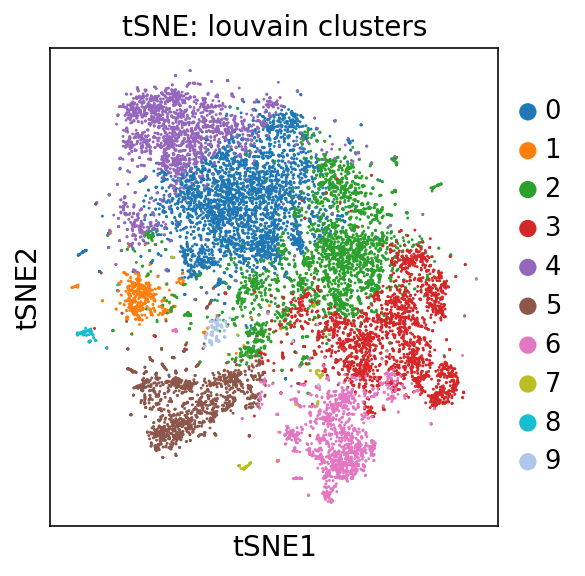

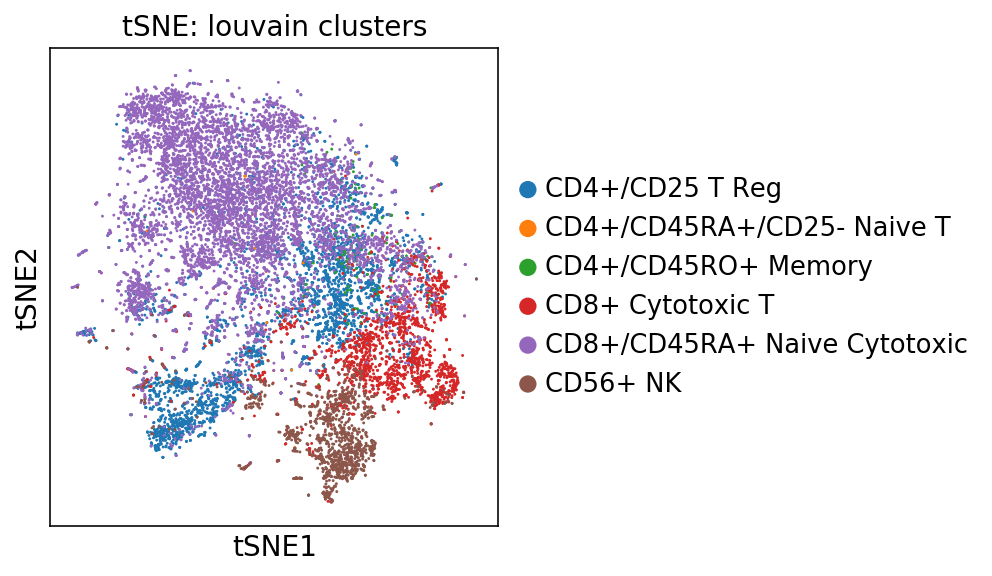

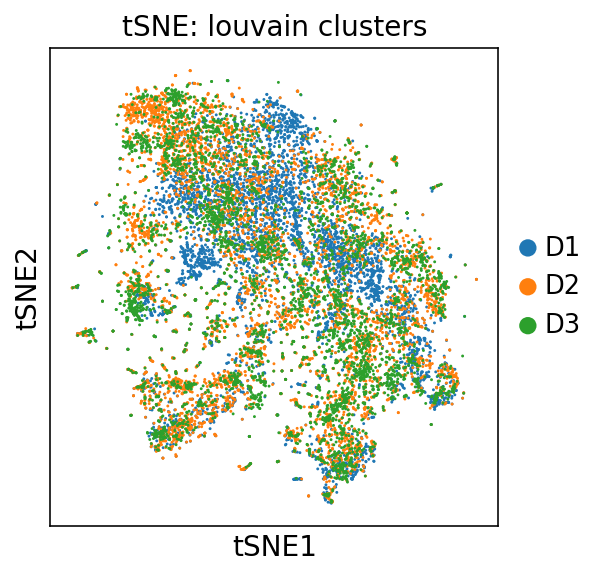

In [118]:
ax = sc.pl.tsne(Tcells_PBMC_data, color='louvain_groups', legend_loc='right margin', title='tSNE: louvain clusters')
ax = sc.pl.tsne(Tcells_PBMC_data, color='old_louvain_groups', legend_loc='right margin', title='tSNE: louvain clusters')
ax = sc.pl.tsne(Tcells_PBMC_data, color='Classification_68K', legend_loc='right margin', title='tSNE: louvain clusters')
ax = sc.pl.tsne(Tcells_PBMC_data, color='key_labels', legend_loc='right margin', title='tSNE: louvain clusters')

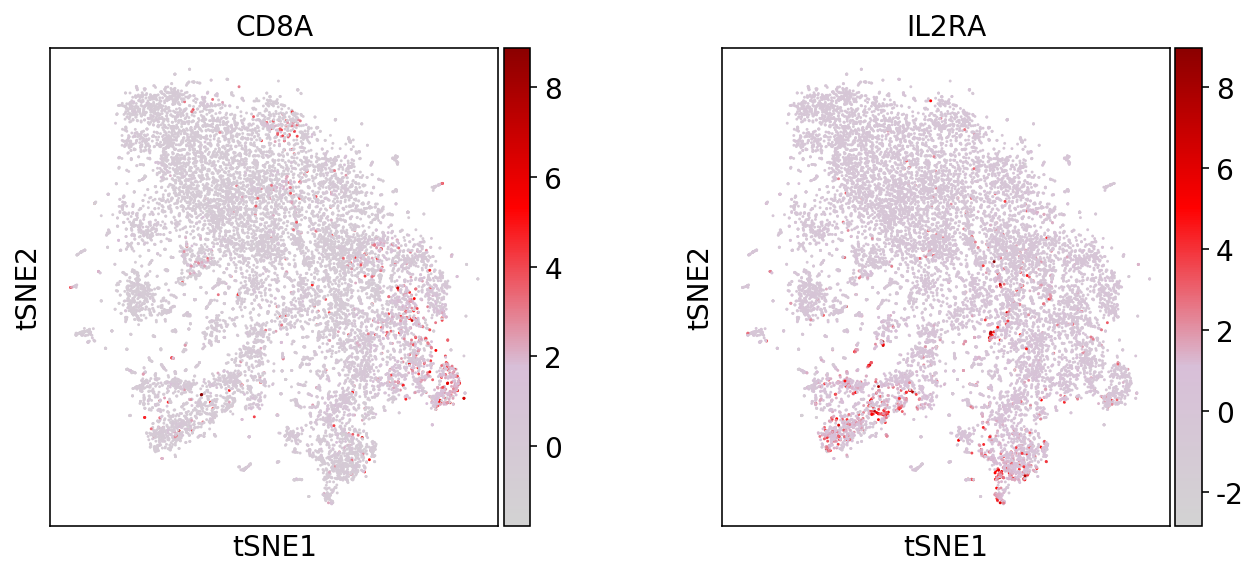

In [115]:
ax = sc.pl.tsne(Tcells_PBMC_data, color=['CD8A', 'IL2RA'], legend_loc='right margin', color_map=cmap)

## Write

In [45]:
sc.write('Tcells_PBMC_data', Tcells_PBMC_data)